In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_data.csv to student_data.csv


In [3]:
import pandas as pd

df = pd.read_csv("student_data.csv")
df.head()

,Name,Section,Teacher,Attendance,Assignments,Grades,Behavior,Extracurricular,FeesPaid,Pass/Fail
0,Student_1,C,Dr. Das,66,50,53,Good,No,Yes,Fail
1,Student_2,D,Mr. Sharma,58,62,95,Good,Yes,Yes,Fail
2,Student_3,A,Mr. Sharma,82,40,69,Moderate,No,Yes,Fail
3,Student_4,C,Mrs. Sahoo,69,85,89,Good,No,Yes,Pass
4,Student_5,C,Dr. Das,62,76,43,Good,No,Yes,Fail


In [4]:
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("student_data.csv")
df.head(5)

,Name,Section,Teacher,Attendance,Assignments,Grades,Behavior,Extracurricular,FeesPaid,Pass/Fail
0,Student_1,C,Dr. Das,66,50,53,Good,No,Yes,Fail
1,Student_2,D,Mr. Sharma,58,62,95,Good,Yes,Yes,Fail
2,Student_3,A,Mr. Sharma,82,40,69,Moderate,No,Yes,Fail
3,Student_4,C,Mrs. Sahoo,69,85,89,Good,No,Yes,Pass
4,Student_5,C,Dr. Das,62,76,43,Good,No,Yes,Fail


In [6]:
df.info()
df.describe() #EDA process

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             500 non-null    object
 1   Section          500 non-null    object
 2   Teacher          500 non-null    object
 3   Attendance       500 non-null    int64 
 4   Assignments      500 non-null    int64 
 5   Grades           500 non-null    int64 
 6   Behavior         500 non-null    object
 7   Extracurricular  500 non-null    object
 8   FeesPaid         500 non-null    object
 9   Pass/Fail        500 non-null    object
dtypes: int64(3), object(7)
memory usage: 39.2+ KB


,Attendance,Assignments,Grades
count,500.000000,500.000000,500.000000
mean,74.946000,70.980000,69.972000
std,15.164796,17.128525,17.673367
min,50.000000,40.000000,40.000000
25%,61.000000,57.000000,54.000000
50%,75.000000,71.000000,70.000000
75%,87.250000,86.000000,85.000000
max,100.000000,100.000000,100.000000


/tmp/ipython-input-276521437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pass/Fail", data=df, palette="coolwarm")


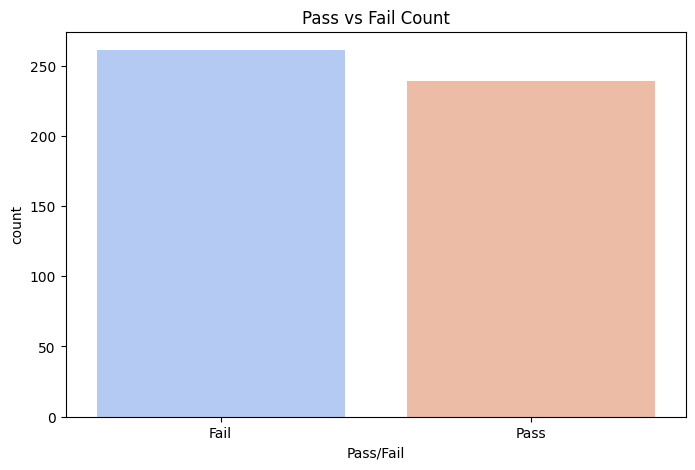

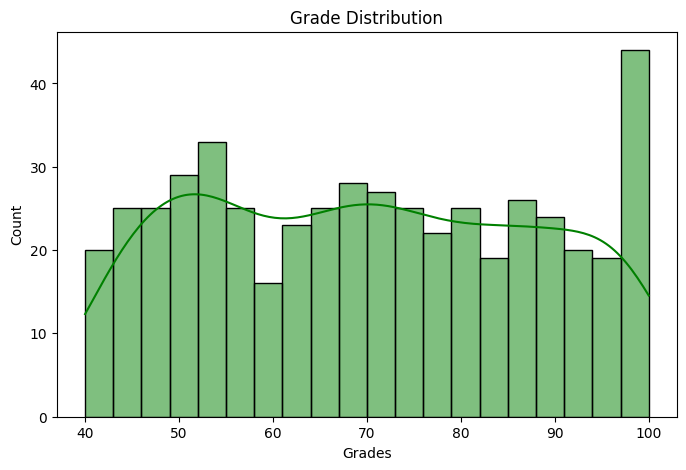

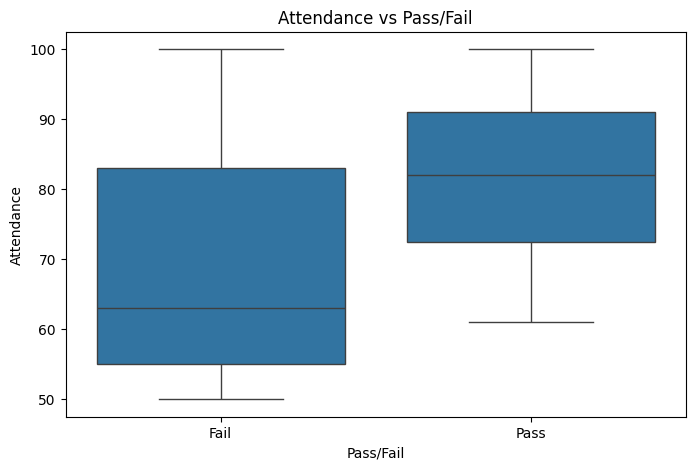

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x="Pass/Fail", data=df, palette="coolwarm")
plt.title("Pass vs Fail Count")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["Grades"], bins=20, kde=True, color="green")
plt.title("Grade Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Pass/Fail", y="Attendance", data=df)
plt.title("Attendance vs Pass/Fail")
plt.show()

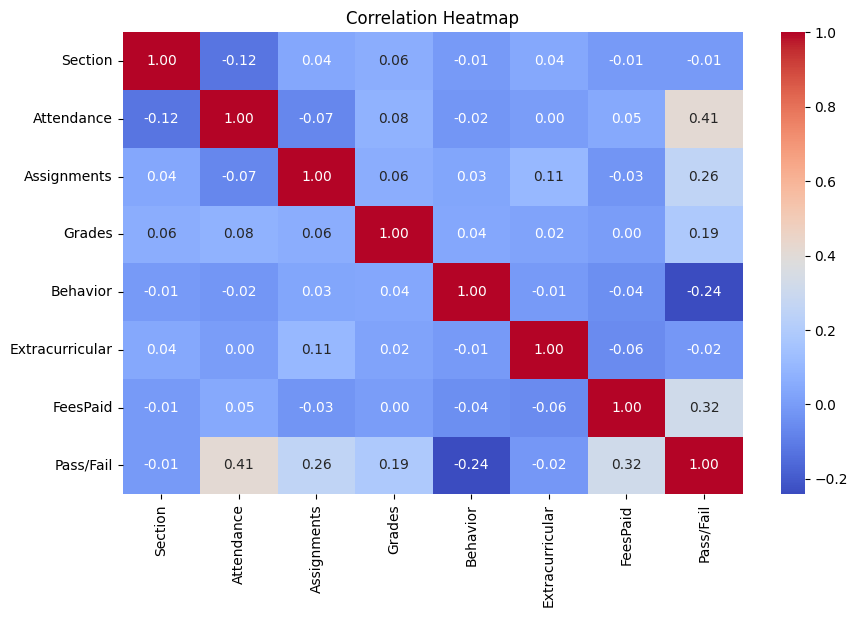

In [8]:
df_num = df.drop(columns=["Name","Teacher"])
label_enc = LabelEncoder()
for col in df_num.columns:
    if df_num[col].dtype == "object":
        df_num[col] = label_enc.fit_transform(df_num[col])

plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
df = df.drop(columns=["Name", "Teacher"])
label_enc = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = label_enc.fit_transform(df[col])

X = df.drop(columns=["Pass/Fail"])
y = df["Pass/Fail"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        58
           1       0.83      0.93      0.88        42

    accuracy                           0.89       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.90      0.89      0.89       100


Decision Tree Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        42

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        42

    accuracy                           1.00       100
   macro avg       1.00      1.0

/tmp/ipython-input-489536583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


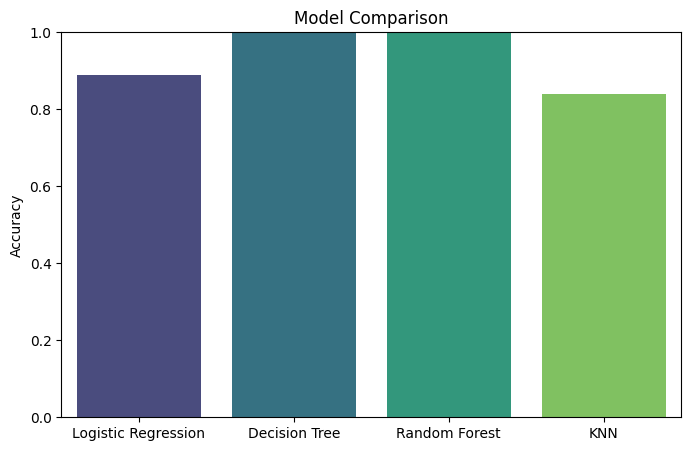

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0,1)
plt.show()

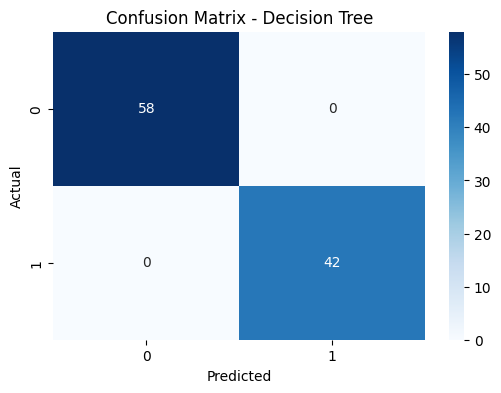

In [13]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

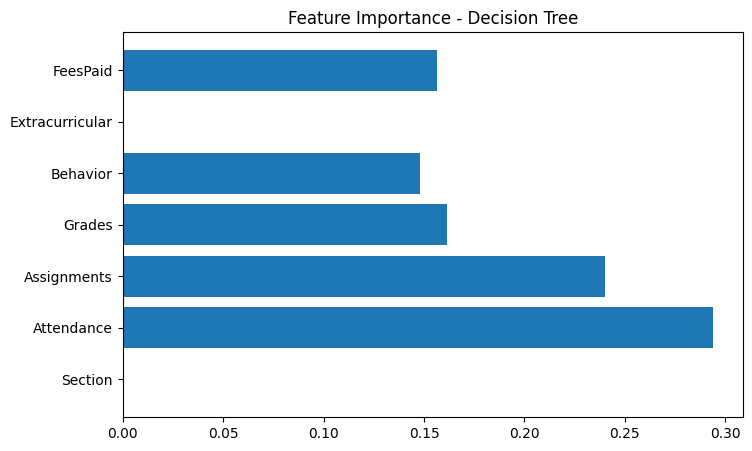

In [14]:
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(8,5))
    plt.barh(feature_names, importances)
    plt.title(f"Feature Importance - {best_model_name}")
    plt.show()